In [2]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#1introduction
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

In [3]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [4]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Buket
[nltk_data]     Fildisi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
stop_words.extend(['greenstoneplus','Source','Resources','Links'])

In [6]:
dff= pd.read_excel('C:/Users/Buket Fildisi/Desktop/BCU/Dissertation/DEV/DATA/Docpdfs.xlsx')
dff.head()#######################

,Unnamed: 0,Context
0,0,x international monetary fund | april 2020 the...
1,1,[' international monetary fund | april 2018 xi...
2,2,['x international monetary fund | october 2017...
3,3,[' international monetary fund | october 2019 ...
4,4,[' international monetary fund | april 2019 ix...


In [8]:
df=dff[['Context']]
df

,Context
0,x international monetary fund | april 2020 the...
1,[' international monetary fund | april 2018 xi...
2,['x international monetary fund | october 2017...
3,[' international monetary fund | october 2019 ...
4,[' international monetary fund | april 2019 ix...
5,[' international monetary fund | october 2023 ...
6,['xii international monetary fund | april 2023...
7,[' international monetary fund | october 2022 ...
8,[' international monetary fund | april 2022 xi...
9,[' international monetary fund | october 2021 ...


In [10]:
df['Context']=df['Context'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop_words)]))
df

C:\Users\Buket Fildisi\AppData\Local\Temp\ipykernel_8980\306018732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Context']=df['Context'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop_words)]))


,Context
0,x international monetary fund | april 2020 cor...
1,[' international monetary fund | april 2018 xi...
2,['x international monetary fund | october 2017...
3,[' international monetary fund | october 2019 ...
4,[' international monetary fund | april 2019 ix...
5,[' international monetary fund | october 2023 ...
6,['xii international monetary fund | april 2023...
7,[' international monetary fund | october 2022 ...
8,[' international monetary fund | april 2022 xi...
9,[' international monetary fund | october 2021 ...


In [11]:
df_list=df["Context"].values.tolist()
df_list

['x international monetary fund | april 2020 coronavirus (covid-19) pandemic presents historic challenge. mid-february, market participants started fear outbreak would become global pandemic, prices equities fell sharply, previously overstretched levels. credit markets, spreads skyrocketed, especially risky segments high-yield bonds, leveraged loans, private debt, issuance essentially came halt. oil prices plummeted face weakening global demand failure opec+ countries reach agreement output cuts, adding leg deterioration risk appetite. volatile market conditions led flight quality, yields safe-haven bonds declining abruptly. number factors amplified asset price moves, contributing sharp tightening financial conditions unprecedented speed. signs strain emerged major short-term funding markets, including global market us dollars—a development reminiscent dynamics last seen financial crisis decade ago. market liquidity deteriorated considerably, including markets traditionally seen deep. 

In [18]:
import string
import re
def text_clean_1(text):
    text = text.lower()
    text= text.replace(".  ",".");
    text= text.replace("'  ',","");
    text= text.replace(" '","'");
    text= text.replace("  ","");
    text= text.replace("•","");
    text=re.sub('\[\' ','',text)
    text=re.sub('\[\'','',text)
    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    return text

In [19]:
df_list[3]

"[' international monetary fund | october 2019 ixfinancial markets buffeted ebb flow trade tensions growing concerns global economic outlook. weakening economic activity increased downside risks prompted shift toward dovish stance monetary policy across globe, development accompanied sharp declines market yields. result, amount bonds negative yields increased $15 trillion. investors expect interest rates remain low longer anticipated beginning year. chapter 1 discusses investors’ search yield left asset prices markets overstretched fostered easing financial conditions since april 2019 global financial stability report.accommodative monetary policy supporting economy near term, easy financial condi-tions encouraging financial risk-taking fueling buildup vulnerabilities sectors countries. chapter 2 shows corporate sector vulnerabilities already elevated several systemically important economies result rising debt burdens weakening debt service capacity. material economic slowdown scenario

In [20]:
text_clean_1(df_list[3])

'international monetary fund  october 2019 ixfinancial markets buffeted ebb flow trade tensions growing concerns global economic outlook weakening economic activity increased downside risks prompted shift toward dovish stance monetary policy across globe development accompanied sharp declines market yields result amount bonds negative yields increased 15 trillion investors expect interest rates remain low longer anticipated beginning year chapter 1 discusses investors’ search yield left asset prices markets overstretched fostered easing financial conditions since april 2019 global financial stability reportaccommodative monetary policy supporting economy near term easy financial conditions encouraging financial risktaking fueling buildup vulnerabilities sectors countries chapter 2 shows corporate sector vulnerabilities already elevated several systemically important economies result rising debt burdens weakening debt service capacity material economic slowdown scenario half severe glob

In [21]:
def remove_stopwords(input_list):
    stop_words = set(stopwords.words('english'))  # You can change 'english' to the appropriate language
    filtered_list = [word for word in input_list if word.lower() not in stop_words]
    return filtered_list

In [22]:
doc=[]
for i in range(len(df_list)):
    doc.append(text_clean_1(df_list[i]))
doc


['x international monetary fund  april 2020 coronavirus covid19 pandemic presents historic challenge midfebruary market participants started fear outbreak would become global pandemic prices equities fell sharply previously overstretched levels credit markets spreads skyrocketed especially risky segments highyield bonds leveraged loans private debt issuance essentially came halt oil prices plummeted face weakening global demand failure opec countries reach agreement output cuts adding leg deterioration risk appetite volatile market conditions led flight quality yields safehaven bonds declining abruptly number factors amplified asset price moves contributing sharp tightening financial conditions unprecedented speed signs strain emerged major shortterm funding markets including global market us dollars—a development reminiscent dynamics last seen financial crisis decade ago market liquidity deteriorated considerably including markets traditionally seen deep leveraged investors came press

In [23]:
type(doc)

list

In [25]:
doc[1]

'international monetary fund  april 2018 xithe global economic outlook continued improve discussed april 2018 world economic outlook pace economic growth picking recovery becoming synchronized around world still supportive economic growth global financial conditions tightened somewhat since october 2017 global financial stability report gfsr tightening reflects primarily bout equity volatility early february decline risky asset prices end march following concerns wider escalation protectionist measuresshortterm risks financial stability increased somewhat relative previous gfsr mediumterm risks continue elevated financial vulnerabilities accumulated years extremely low rates volatility could make road ahead bumpy could put growth risk indeed growthatrisk analysis described chapter 3 october 2017 gfsr shows risks mediumterm economic growth stemming easy financial conditions remain well historical norms advanced economies stronger growth momentum firming inflation eased extent key challe

In [26]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  
        # deacc=True removes punctuations

data_words = list(sent_to_words(doc))

print(data_words[:1])

[['international', 'monetary', 'fund', 'april', 'coronavirus', 'covid', 'pandemic', 'presents', 'historic', 'challenge', 'midfebruary', 'market', 'participants', 'started', 'fear', 'outbreak', 'would', 'become', 'global', 'pandemic', 'prices', 'equities', 'fell', 'sharply', 'previously', 'overstretched', 'levels', 'credit', 'markets', 'spreads', 'skyrocketed', 'especially', 'risky', 'segments', 'highyield', 'bonds', 'leveraged', 'loans', 'private', 'debt', 'issuance', 'essentially', 'came', 'halt', 'oil', 'prices', 'plummeted', 'face', 'weakening', 'global', 'demand', 'failure', 'opec', 'countries', 'reach', 'agreement', 'output', 'cuts', 'adding', 'leg', 'deterioration', 'risk', 'appetite', 'volatile', 'market', 'conditions', 'led', 'flight', 'quality', 'yields', 'safehaven', 'bonds', 'declining', 'abruptly', 'number', 'factors', 'amplified', 'asset', 'price', 'moves', 'contributing', 'sharp', 'tightening', 'financial', 'conditions', 'unprecedented', 'speed', 'signs', 'strain', 'emerg

In [27]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(doc, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[doc], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['international', 'monetary', 'fund', 'april', 'coronavirus', 'covid', 'pandemic', 'presents', 'historic', 'challenge', 'midfebruary', 'market', 'participants', 'started', 'fear', 'outbreak', 'would', 'become', 'global', 'pandemic', 'prices', 'equities', 'fell', 'sharply', 'previously', 'overstretched', 'levels', 'credit', 'markets', 'spreads', 'skyrocketed', 'especially', 'risky', 'segments', 'highyield', 'bonds', 'leveraged', 'loans', 'private', 'debt', 'issuance', 'essentially', 'came', 'halt', 'oil', 'prices', 'plummeted', 'face', 'weakening', 'global', 'demand', 'failure', 'opec', 'countries', 'reach', 'agreement', 'output', 'cuts', 'adding', 'leg', 'deterioration', 'risk', 'appetite', 'volatile', 'market', 'conditions', 'led', 'flight', 'quality', 'yields', 'safehaven', 'bonds', 'declining', 'abruptly', 'number', 'factors', 'amplified', 'asset', 'price', 'moves', 'contributing', 'sharp', 'tightening', 'financial', 'conditions', 'unprecedented', 'speed', 'signs', 'strain', 'emerge

In [28]:
# Define functions for bigrams, trigrams and lemmatization
import io
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [29]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load("en_core_web_sm")

#lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['international', 'monetary', 'present', 'historic', 'challenge', 'midfebruary', 'market', 'participant', 'start', 'fear', 'outbreak', 'become', 'global', 'pandemic', 'price', 'equity', 'fall', 'sharply', 'previously', 'overstretch', 'level', 'credit', 'market', 'spread', 'skyrocket', 'especially', 'risky', 'segment', 'highyield', 'bond', 'leverage', 'loan', 'private', 'debt', 'issuance', 'essentially', 'come', 'halt', 'oil', 'price', 'plummet', 'face', 'weaken', 'global', 'demand', 'failure', 'opec', 'country', 'reach', 'agreement', 'output', 'cut', 'add', 'leg', 'deterioration', 'risk', 'appetite', 'volatile', 'market', 'condition', 'lead', 'flight', 'quality', 'yield', 'safehaven', 'bond', 'decline', 'abruptly', 'number', 'factor', 'amplify', 'asset', 'price', 'move', 'contribute', 'sharp', 'tighten', 'financial', 'condition', 'unprecedented', 'speed', 'sign', 'strain', 'emerge', 'major', 'shortterm', 'funding', 'market', 'include', 'global', 'market', 'dollar', 'development', 'rem

In [30]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 2), (1, 1), (2, 1), (3, 4), (4, 1), (5, 4), (6, 2), (7, 1), (8, 1), (9, 1), (10, 4), (11, 1), (12, 5), (13, 2), (14, 2), (15, 2), (16, 2), (17, 3), (18, 4), (19, 1), (20, 2), (21, 2), (22, 1), (23, 1), (24, 10), (25, 1), (26, 1), (27, 4), (28, 2), (29, 2), (30, 1), (31, 15), (32, 1), (33, 3), (34, 2), (35, 2), (36, 1), (37, 4), (38, 4), (39, 3), (40, 1), (41, 1), (42, 1), (43, 3), (44, 1), (45, 6), (46, 1), (47, 2), (48, 5), (49, 5), (50, 1), (51, 1), (52, 2), (53, 6), (54, 2), (55, 1), (56, 7), (57, 1), (58, 8), (59, 1), (60, 1), (61, 2), (62, 2), (63, 2), (64, 1), (65, 2), (66, 3), (67, 2), (68, 10), (69, 5), (70, 1), (71, 8), (72, 1), (73, 2), (74, 8), (75, 4), (76, 2), (77, 4), (78, 13), (79, 2), (80, 3), (81, 2), (82, 2), (83, 1), (84, 2), (85, 1), (86, 2), (87, 2), (88, 2), (89, 1), (90, 1), (91, 1), (92, 2), (93, 1), (94, 2), (95, 4), (96, 2), (97, 1), (98, 1), (99, 14), (100, 1), (101, 9), (102, 2), (103, 2), (104, 2), (105, 4), (106, 3), (107, 2), (108, 2), (109, 1), (11

In [31]:
id2word[0]

'abruptly'

In [32]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abruptly', 2),
  ('absorb', 1),
  ('access', 1),
  ('action', 4),
  ('actively', 1),
  ('activity', 4),
  ('add', 2),
  ('additionally', 1),
  ('adequacy', 1),
  ('adequate', 1),
  ('adjustment', 4),
  ('advanced', 1),
  ('affect', 5),
  ('ago', 2),
  ('agreement', 2),
  ('aim', 2),
  ('already', 2),
  ('also', 3),
  ('amplify', 4),
  ('announce', 1),
  ('appetite', 2),
  ('appropriate', 2),
  ('appropriately', 1),
  ('ask', 1),
  ('asset', 10),
  ('assistance', 1),
  ('associate', 1),
  ('authority', 4),
  ('available', 2),
  ('avoid', 2),
  ('balance', 1),
  ('bank', 15),
  ('battle', 1),
  ('become', 3),
  ('bilateral', 2),
  ('blow', 2),
  ('bold', 1),
  ('bond', 4),
  ('borrow', 4),
  ('borrower', 3),
  ('breaker', 1),
  ('broad', 1),
  ('buffer', 1),
  ('call', 3),
  ('capacity', 1),
  ('capital', 6),
  ('case', 1),
  ('cause', 2),
  ('central', 5),
  ('challenge', 5),
  ('circuit', 1),
  ('clearly', 1),
  ('close', 2),
  ('come', 6),
  ('commodity', 2),
  ('communicate', 1),

In [71]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=14,                                            
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [72]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.028*"market" + 0.021*"risk" + 0.018*"financial" + 0.013*"bank" + 0.012*"global" + 0.011*"growth" + 0.011*"economy" + 0.011*"credit" + 0.010*"low" + 0.010*"policy"'), (1, '0.033*"market" + 0.021*"financial" + 0.018*"risk" + 0.015*"credit" + 0.014*"director" + 0.011*"note" + 0.010*"global" + 0.008*"investor" + 0.007*"sector" + 0.006*"also"'), (2, '0.023*"risk" + 0.022*"financial" + 0.017*"bank" + 0.015*"policy" + 0.015*"market" + 0.012*"credit" + 0.011*"economy" + 0.010*"economic" + 0.010*"capital" + 0.010*"global"'), (3, '0.024*"market" + 0.021*"financial" + 0.017*"risk" + 0.016*"credit" + 0.013*"bank" + 0.010*"global" + 0.008*"asset" + 0.008*"system" + 0.007*"country" + 0.007*"price"'), (4, '0.002*"market" + 0.001*"financial" + 0.001*"risk" + 0.001*"bank" + 0.001*"policy" + 0.001*"emerge" + 0.001*"global" + 0.001*"economy" + 0.001*"sector" + 0.001*"credit"'), (5, '0.032*"financial" + 0.029*"market" + 0.021*"risk" + 0.017*"global" + 0.012*"emerge" + 0.010*"country" + 0.008*"dire

In [73]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.749860574551687

Coherence Score:  0.3000112824240394


In [36]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\Buket Fildisi\anaconda3\Lib\site-packages\pyLDAvis\_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.072638  0.046437       1        1  21.601569
0      0.107527  0.020717       2        1  16.023392
2      0.081529  0.051167       3        1   9.878296
18     0.042090 -0.076507       4        1   8.315054
12     0.113362  0.034390       5        1   6.040466
9      0.135759  0.084025       6        1   5.833929
3      0.096260  0.057675       7        1   5.809258
19     0.055587 -0.098995       8        1   5.792640
8      0.101517  0.010830       9        1   3.797455
16     0.110465  0.048413      10        1   3.500168
7      0.028212  0.067612      11        1   3.109232
14     0.039329 -0.150890      12        1   2.898851
5      0.031227 -0.176820      13        1   2.860114
1      0.077396  0.085592      14        1   2.696095
17    -0.013647 -0.129113      15        1   1.838698
15    -0.197318  0.020174      16        1   0.000958
4     -0.225285  0.027086      17        1   0.000957
13    -0.224086  0.026073      18        1   0.000957
11    -0.207709  0.026593      19        1   0.000957
6     -0.224854  0.025542      20        1   0.000956, topic_info=          Term         Freq        Total Category  logprob  loglift
203     market  2151.000000  2151.000000  Default  30.0000  30.0000
127  financial  1983.000000  1983.000000  Default  29.0000  29.0000
295       risk  1458.000000  1458.000000  Default  28.0000  28.0000
31        bank  1016.000000  1016.000000  Default  27.0000  27.0000
145     global  1004.000000  1004.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
283     report     0.000414   270.475617  Topic20  -7.6154  -1.8315
400   continue     0.000437   414.454064  Topic20  -7.5628  -2.2057
339    support     0.000425   407.123799  Topic20  -7.5903  -2.2153
30     balance     0.000426   435.599118  Topic20  -7.5882  -2.2808
501     remain     0.000417   401.537234  Topic20  -7.6084  -2.2197

[1499 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
1744      5  0.829447        aaafigure
3096      2  0.835195  abatedshortterm
3572      2  0.834990        abenomics
3098      2  0.864141           abroad
550       2  0.077520           abrupt
...     ...       ...              ...
1934     11  0.602054         ﬁnancial
1224      6  0.947808        ﬁrmsshare
1225      6  0.921736   ﬁrmsstateowned
1935      1  0.153098              ﬂow
1935      4  0.765490              ﬂow

[3048 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 1, 3, 19, 13, 10, 4, 20, 9, 17, 8, 15, 6, 2, 18, 16, 5, 14, 12, 7])

In [38]:
#Building LDA Mallet Model
#import os
#from gensim.models.wrappers import LdaMallet
#mallet_path = 'C:/Users/Buket Fildisi/mallet-2.0.8/bin/mallet' # update this path
#ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

How to find optimal number of topic

In [39]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics)
        #gensim.models.wrappers.LdaMallet( corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [56]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

In [ ]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [57]:
#If the coherence score seems to keep increasing, 
#it may make better sense to pick the model that gave the highest CV before flattening out.
#x = range(2, 40, 6)
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2701
Num Topics = 8  has Coherence Value of 0.2684
Num Topics = 14  has Coherence Value of 0.2836
Num Topics = 20  has Coherence Value of 0.282
Num Topics = 26  has Coherence Value of 0.28
Num Topics = 32  has Coherence Value of 0.2807
Num Topics = 38  has Coherence Value of 0.2795


In [74]:
model_list[6]

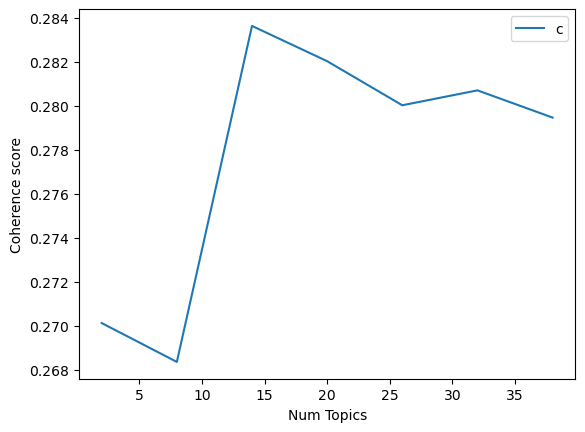

In [58]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [59]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=10))

[(0, '0.030*"market" + 0.027*"financial" + 0.015*"risk" + 0.014*"bank" + 0.012*"policy" + 0.010*"global" + 0.009*"economy" + 0.008*"emerge" + 0.008*"sector" + 0.008*"monetary"'), (1, '0.028*"financial" + 0.026*"market" + 0.016*"risk" + 0.011*"emerge" + 0.010*"global" + 0.009*"bank" + 0.007*"policy" + 0.007*"credit" + 0.007*"growth" + 0.006*"system"'), (2, '0.029*"market" + 0.024*"financial" + 0.016*"risk" + 0.012*"global" + 0.012*"economy" + 0.011*"emerge" + 0.011*"policy" + 0.010*"bank" + 0.007*"credit" + 0.007*"increase"'), (3, '0.018*"financial" + 0.018*"market" + 0.017*"risk" + 0.012*"bank" + 0.012*"global" + 0.008*"policy" + 0.008*"economy" + 0.008*"asset" + 0.008*"sector" + 0.007*"capital"'), (4, '0.025*"financial" + 0.021*"market" + 0.019*"risk" + 0.011*"global" + 0.010*"bank" + 0.010*"policy" + 0.007*"balance" + 0.007*"credit" + 0.007*"economy" + 0.007*"monetary"'), (5, '0.024*"financial" + 0.018*"risk" + 0.017*"market" + 0.012*"global" + 0.009*"policy" + 0.009*"bank" + 0.007*"

In [60]:
visOpt = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
visOpt
#we can see the optimal topic number 

C:\Users\Buket Fildisi\anaconda3\Lib\site-packages\pyLDAvis\_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.010021  0.001159       1        1  38.869503
2      0.007072  0.004776       2        1  24.966083
11    -0.002329  0.009920       3        1  10.778859
9      0.005496 -0.002641       4        1   9.076229
7      0.001196 -0.002913       5        1   4.474792
1      0.003967  0.001196       6        1   4.087468
10     0.001848  0.000376       7        1   3.279260
8     -0.011001  0.006225       8        1   3.111026
3     -0.001461 -0.000324       9        1   0.995039
5     -0.002633 -0.005817      10        1   0.220214
4     -0.005607 -0.004711      11        1   0.088345
6     -0.003028 -0.008528      12        1   0.039819
13    -0.006596  0.001368      13        1   0.009168
12     0.003054 -0.000086      14        1   0.004194, topic_info=          Term         Freq        Total Category  logprob  loglift
127  financial  2110.000000  2110.000000  Default  30.0000  30.0000
203     market  2488.000000  2488.000000  Default  29.0000  29.0000
295       risk  1406.000000  1406.000000  Default  28.0000  28.0000
145     global   975.000000   975.000000  Default  27.0000  27.0000
31        bank  1065.000000  1065.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
68     country     0.016227   424.321770  Topic14  -5.4258  -0.0922
248     policy     0.024438   962.177729  Topic14  -5.0164  -0.5015
58   condition     0.015941   471.772972  Topic14  -5.4436  -0.2161
400   continue     0.014959   410.788523  Topic14  -5.5072  -0.1412
30     balance     0.014930   409.274218  Topic14  -5.5092  -0.1395

[1185 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
4036      2  0.416120     accommodate
3461      1  0.672514     accompanied
3696      1  0.194065  accountability
3696      2  0.194065  accountability
3696      3  0.194065  accountability
...     ...       ...             ...
1935      1  0.256817             ﬂow
1935      2  0.428029             ﬂow
1935      3  0.085606             ﬂow
1935      4  0.085606             ﬂow
1935      7  0.085606             ﬂow

[2832 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 12, 10, 8, 2, 11, 9, 4, 6, 5, 7, 14, 13])

In [61]:
#to find dominant topic in each doc
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_lemmatized):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data_lemmatized)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

C:\Users\Buket Fildisi\AppData\Local\Temp\ipykernel_8980\1719133165.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\Buket Fildisi\AppData\Local\Temp\ipykernel_8980\1719133165.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\Buket Fildisi\AppData\Local\Temp\ipykernel_8980\1719133165.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0,0.8852,"market, financial, risk, bank, policy, global,...","[international, monetary, present, historic, c..."
1,1,0,0.3579,"market, financial, risk, bank, policy, global,...","[international, monetary, economic, outlook, c..."
2,2,0,0.9591,"market, financial, risk, bank, policy, global,...","[international, monetary, fund, nearterm, risk..."
3,3,2,0.5571,"market, financial, risk, global, economy, emer...","[international, monetary, fund, ixfinancial, m..."
4,4,0,0.8609,"market, financial, risk, bank, policy, global,...","[international, monetary, ixfinancial, conditi..."
5,5,2,0.9175,"market, financial, risk, global, economy, emer...","[international, monetary, land, abrupt, core, ..."
6,6,2,0.9715,"market, financial, risk, global, economy, emer...","[international, financial, system, test, high,..."
7,7,2,0.8743,"market, financial, risk, global, economy, emer...","[international, monetary, economy, experience,..."
8,8,0,0.5971,"market, financial, risk, bank, policy, global,...","[international, monetary, financial, condition..."
9,9,0,0.9859,"market, financial, risk, bank, policy, global,...","[international, monetary, xioverall, assessmen..."


In [62]:
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0,0.8852,"market, financial, risk, bank, policy, global,...","[international, monetary, present, historic, c..."
1,1,0,0.3579,"market, financial, risk, bank, policy, global,...","[international, monetary, economic, outlook, c..."
2,2,0,0.9591,"market, financial, risk, bank, policy, global,...","[international, monetary, fund, nearterm, risk..."
3,3,2,0.5571,"market, financial, risk, global, economy, emer...","[international, monetary, fund, ixfinancial, m..."
4,4,0,0.8609,"market, financial, risk, bank, policy, global,...","[international, monetary, ixfinancial, conditi..."
5,5,2,0.9175,"market, financial, risk, global, economy, emer...","[international, monetary, land, abrupt, core, ..."
6,6,2,0.9715,"market, financial, risk, global, economy, emer...","[international, financial, system, test, high,..."
7,7,2,0.8743,"market, financial, risk, global, economy, emer...","[international, monetary, economy, experience,..."
8,8,0,0.5971,"market, financial, risk, bank, policy, global,...","[international, monetary, financial, condition..."
9,9,0,0.9859,"market, financial, risk, bank, policy, global,...","[international, monetary, xioverall, assessmen..."


In [63]:
df_dominant_topic.to_excel('C:/Users/Buket Fildisi/Desktop/BCU/Dissertation/DEV/DATA/Results/ExecSum_doc.xlsx')

In [64]:
#Topic Distribution 
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,0,"market, financial, risk, bank, policy, global,...",17.0,0.4146
1,0,"market, financial, risk, bank, policy, global,...",2.0,0.0488
2,0,"market, financial, risk, bank, policy, global,...",11.0,0.2683
3,2,"market, financial, risk, global, economy, emer...",NaN,NaN
4,0,"market, financial, risk, bank, policy, global,...",1.0,0.0244
5,2,"market, financial, risk, global, economy, emer...",NaN,NaN
6,2,"market, financial, risk, global, economy, emer...",NaN,NaN
7,2,"market, financial, risk, global, economy, emer...",1.0,0.0244
8,0,"market, financial, risk, bank, policy, global,...",1.0,0.0244
9,0,"market, financial, risk, bank, policy, global,...",3.0,0.0732


In [65]:
d = df_dominant_topics['Topic_Keywords'].tolist()
wordclouddeneme= ' '.join(map(str, d)) 
wordclouddeneme

'market, financial, risk, bank, policy, global, economy, emerge, sector, monetary market, financial, risk, bank, policy, global, economy, emerge, sector, monetary market, financial, risk, bank, policy, global, economy, emerge, sector, monetary market, financial, risk, global, economy, emerge, policy, bank, credit, increase market, financial, risk, bank, policy, global, economy, emerge, sector, monetary market, financial, risk, global, economy, emerge, policy, bank, credit, increase market, financial, risk, global, economy, emerge, policy, bank, credit, increase market, financial, risk, global, economy, emerge, policy, bank, credit, increase market, financial, risk, bank, policy, global, economy, emerge, sector, monetary market, financial, risk, bank, policy, global, economy, emerge, sector, monetary market, financial, risk, bank, policy, global, economy, emerge, sector, monetary market, financial, risk, bank, policy, global, economy, emerge, sector, monetary market, financial, risk, gl

In [66]:
from wordcloud import WordCloud, STOPWORDS

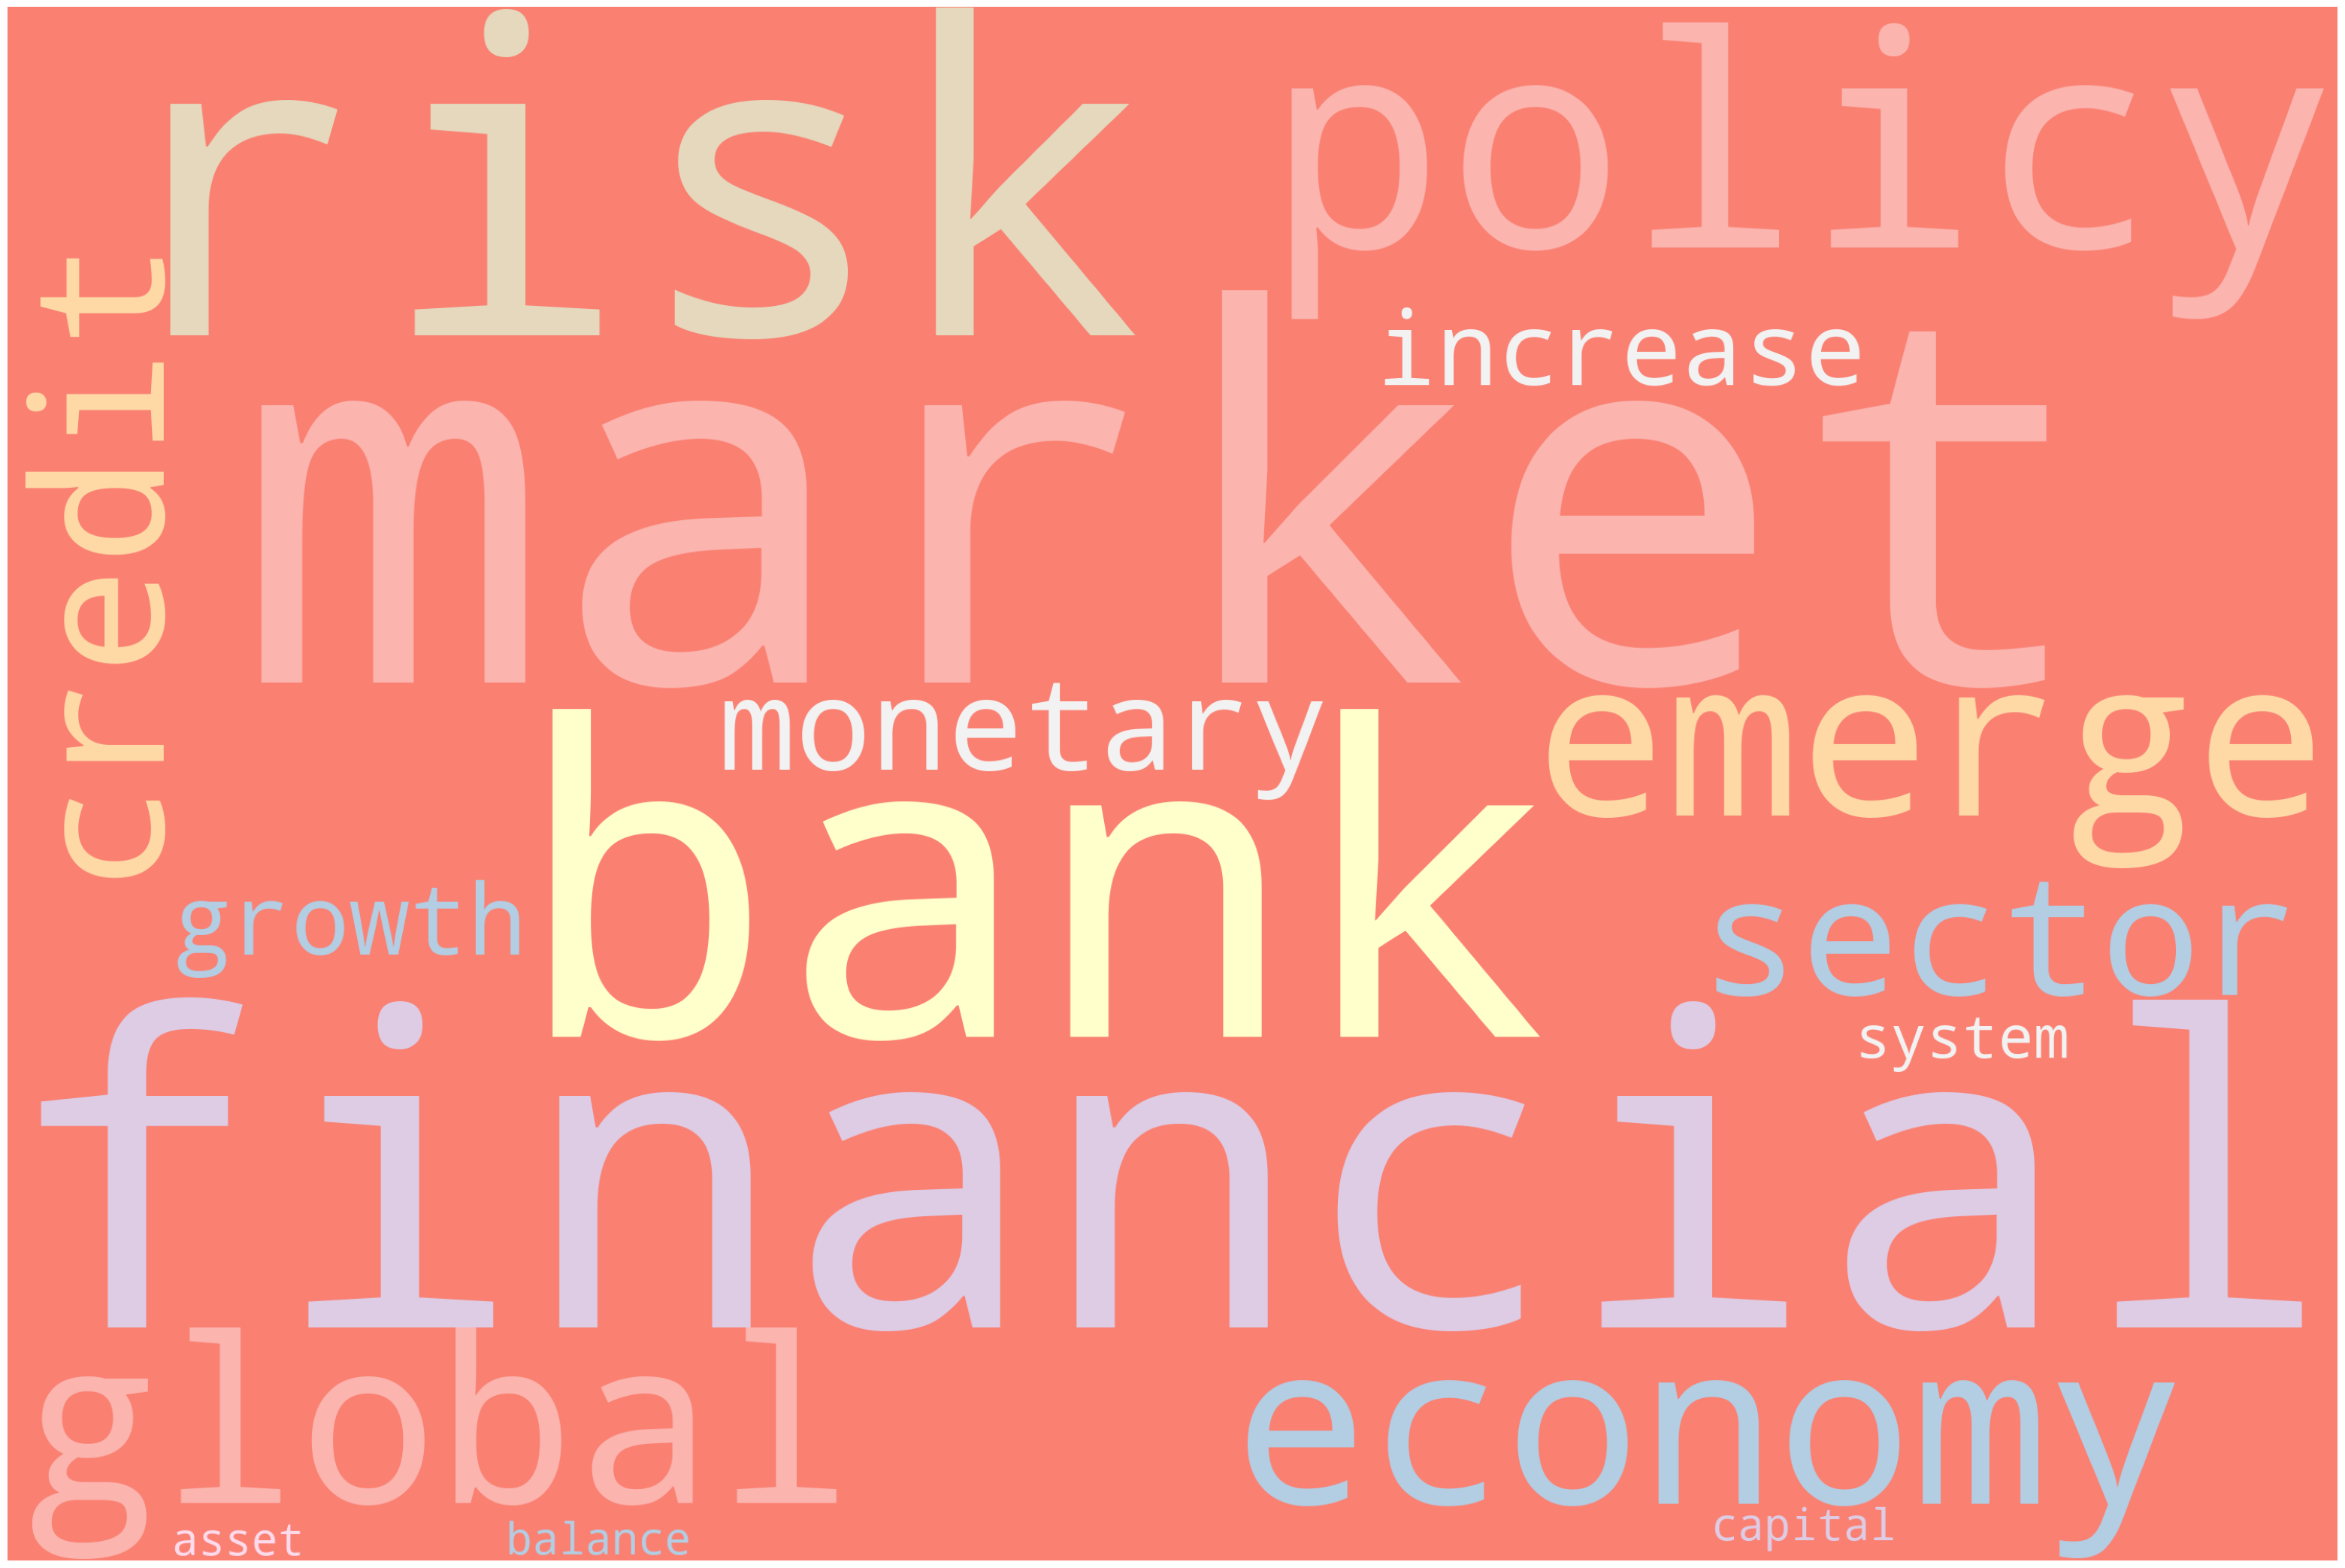

In [67]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")
# Import package

# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = stop_words).generate(wordclouddeneme)
# Plot
plot_cloud(wordcloud)

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
y=df_dominant_topic['Keywords'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
print(y)
keywords_list = [keyword for sublist in y for keyword in sublist]
print(keywords_list)
# Count the occurrences of each keyword
keyword_counts = pd.Series(keywords_list).value_counts()
print(keyword_counts)

0     [market, financial, risk, bank, policy, global...
1     [market, financial, risk, bank, policy, global...
2     [market, financial, risk, bank, policy, global...
3     [market, financial, risk, global, economy, eme...
4     [market, financial, risk, bank, policy, global...
5     [market, financial, risk, global, economy, eme...
6     [market, financial, risk, global, economy, eme...
7     [market, financial, risk, global, economy, eme...
8     [market, financial, risk, bank, policy, global...
9     [market, financial, risk, bank, policy, global...
10    [market, financial, risk, bank, policy, global...
11    [market, financial, risk, bank, policy, global...
12    [market, financial, risk, global, economy, eme...
13    [financial, market, risk, bank, global, policy...
14    [market, financial, risk, global, economy, eme...
15    [financial, market, risk, bank, global, policy...
16    [market, financial, risk, global, policy, bank...
17    [financial, market, risk, emerge, global, 

In [69]:
len(keyword_counts)

17

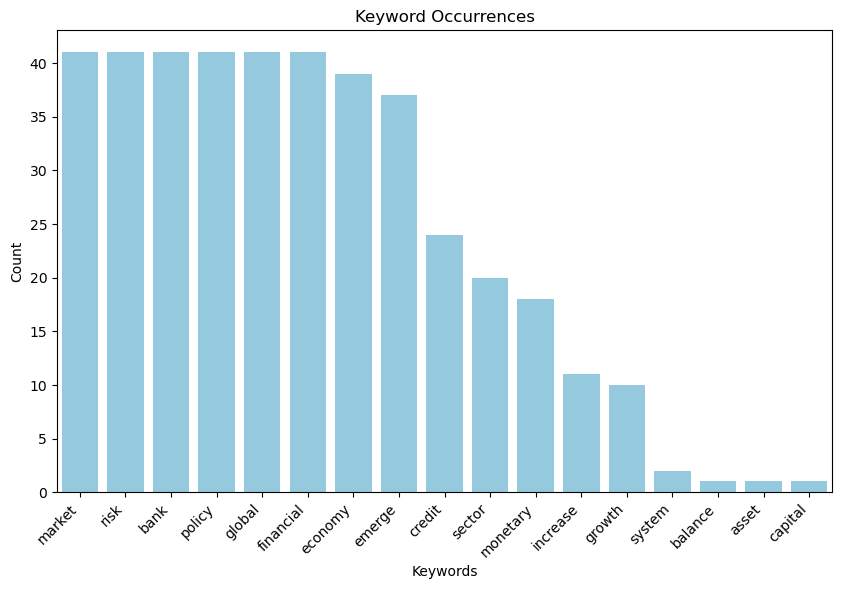

In [70]:
# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=keyword_counts.index, y=keyword_counts.values, color='skyblue')
plt.title('Keyword Occurrences')
plt.xlabel('Keywords')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()